<a href="https://colab.research.google.com/github/Ssandeepgupta99/EDA-Capstone-/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

**Importing Dataset and Library**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline
import math


In [3]:
play_store = pd.read_csv("/content/Play Store Data.csv")

In [4]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
play_store.shape

(10841, 13)

In [8]:
list(play_store.columns)

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [10]:
play_store.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


missing value

In [11]:
missingvalues_percentage =play_store.isna().sum().sort_values(ascending= False)/len(play_store) #To get the percentage of null values each column wise
missingvalues_percentage

Rating            0.135965
Current Ver       0.000738
Android Ver       0.000277
Type              0.000092
Content Rating    0.000092
App               0.000000
Category          0.000000
Reviews           0.000000
Size              0.000000
Installs          0.000000
Price             0.000000
Genres            0.000000
Last Updated      0.000000
dtype: float64

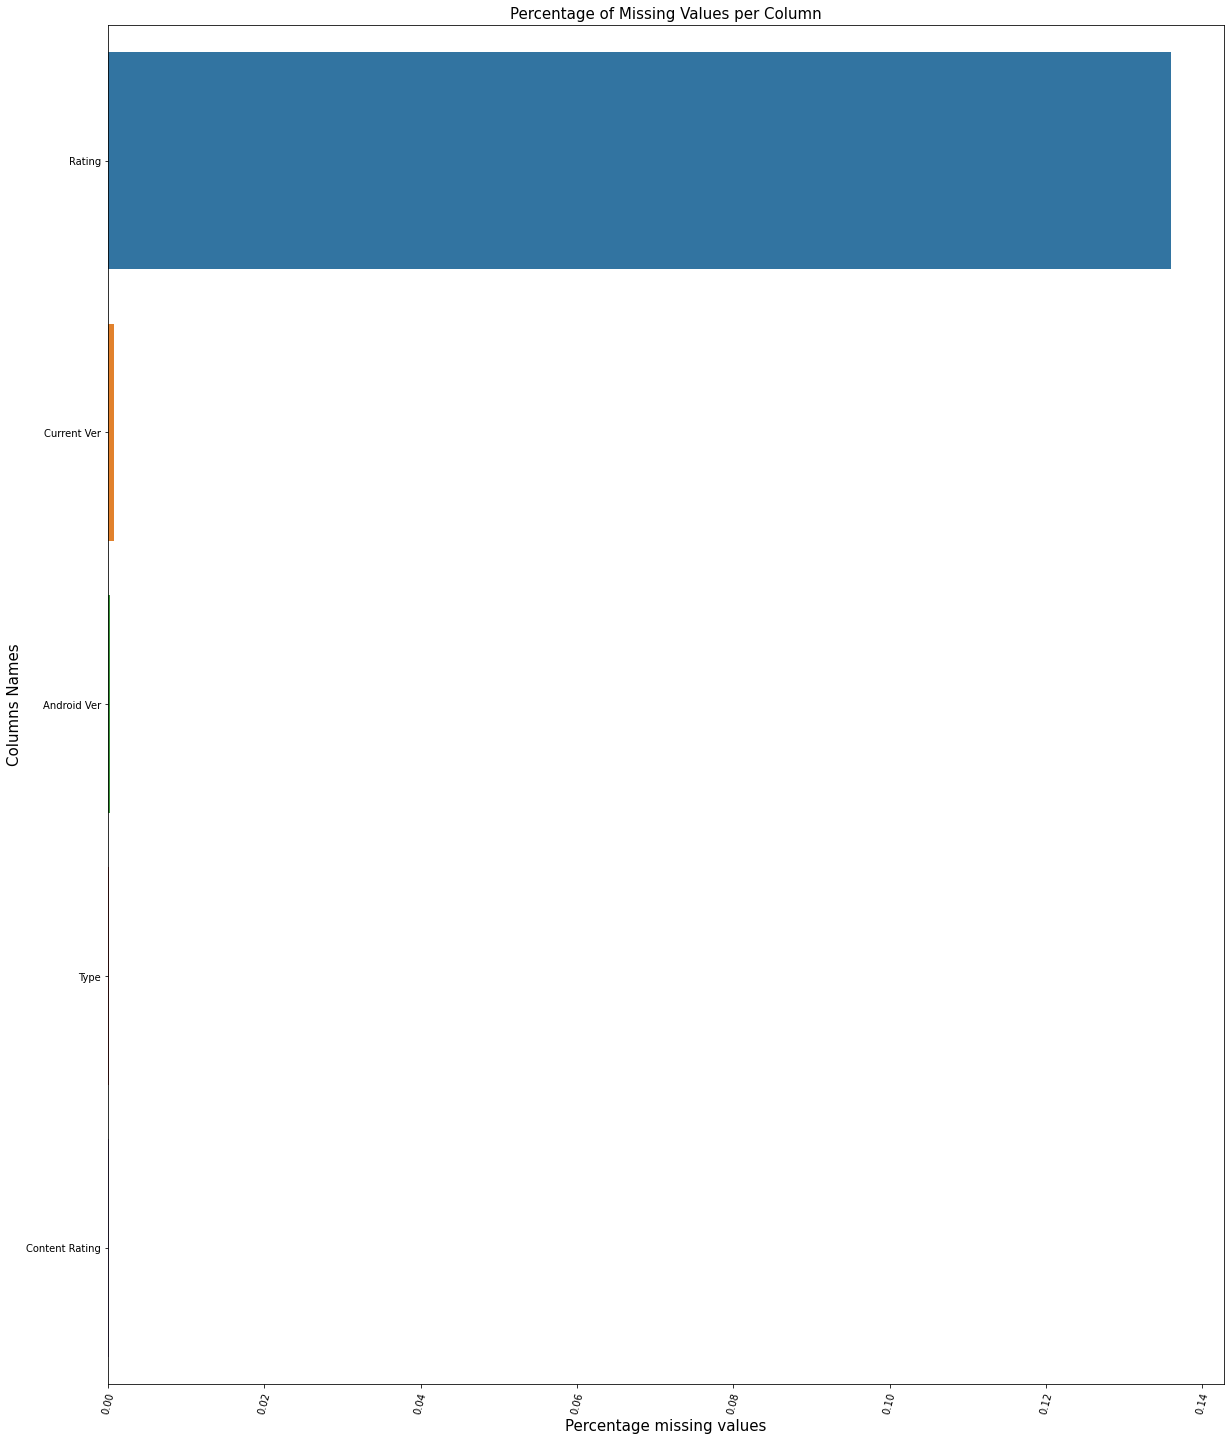

In [16]:
# Plotting graph for finding columnwise missing values
plt.figure(figsize=(20,25))
plt.xticks(rotation=75)
plt.yticks(fontsize=10)
plt.title("Percentage of Missing Values per Column",fontsize=15)

b=sns.barplot(x=missingvalues_percentage[missingvalues_percentage>0.0],y=missingvalues_percentage[missingvalues_percentage>0.0].index)
b.set_ylabel("Columns Names",fontsize= 15)
b.set_xlabel("Percentage missing values",fontsize= 15)
plt.show()

In [17]:
# Finding the columns that have more than 15% missing values
drop_columns_list = list(missingvalues_percentage[missingvalues_percentage>0.15].index.values)

In [19]:
# Dropping the Missing value columns from the data set
play_store.drop(drop_columns_list,inplace=True,axis=1)

In [21]:
play_store.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [22]:
play_store.shape

(10841, 13)

In [23]:
# Exploring the remaining columns data for missing values
missingvalues_percentage =play_store.isna().sum().sort_values(ascending= False)/len(play_store) #To get the percentage of null values each column wise
missingvalues_percentage

Rating            0.135965
Current Ver       0.000738
Android Ver       0.000277
Type              0.000092
Content Rating    0.000092
App               0.000000
Category          0.000000
Reviews           0.000000
Size              0.000000
Installs          0.000000
Price             0.000000
Genres            0.000000
Last Updated      0.000000
dtype: float64

<Figure size 432x360 with 0 Axes>

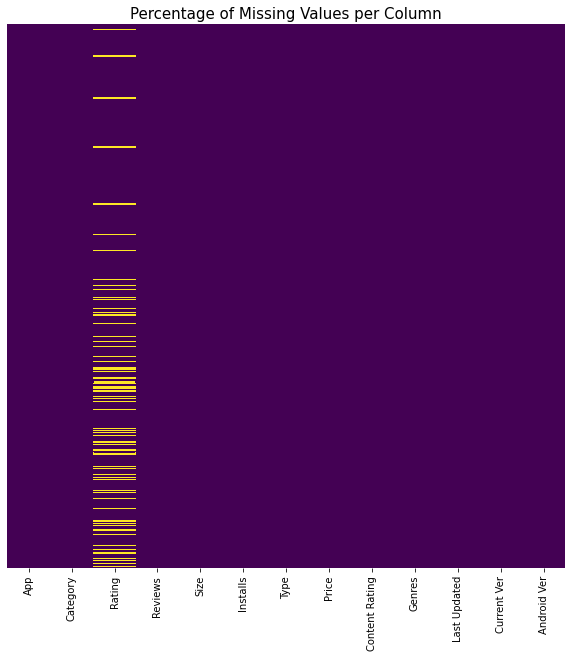

In [27]:
# plt.figure(figsize=(25,20))
# plt.xticks(rotation=75)
# plt.yticks(fontsize=15)
# plt.title("Percentage of Missing Values per Column",fontsize=15)

# b=sns.barplot(x=missingvalues_percentage,y=missingvalues_percentage.index)
# b.set_ylabel("Columns Names",fontsize= 15)
# b.set_xlabel("Percentage missing values",fontsize= 15)
# plt.show()

plt.figure(figsize=(6,5))
plt.figure(figsize=(10,10))
plt.title("Percentage of Missing Values per Column",fontsize=15)
sns.heatmap(play_store.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
